In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
from eda_module import *
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
data = pd.read_csv('churn_data.csv')
df = data.copy()

In [39]:
df.shape

(7043, 21)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [41]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [43]:
#Print number of rows in DF
print(f"Rows: {df.shape[0]} \n")
#Print number of features in DF
print(f"Features: {df.shape[1]} \n")
#Print total number of missing values
print(f"Missing Values: {df.isnull().values.sum()} \n")
#Print number of unique values per feature location
print(f"Unique Values: {df.nunique()} \n")

Rows: 7043 

Features: 21 

Missing Values: 0 

Unique Values: customerid          7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64 



# **Our Data**
We have 7043 rows (each representing a unique customer) with 21 columns:     19 features, 1 target feature (Churn)
### **Target:**
- Churn (binary)
    
### **Nominal Features:**
- Tenure
- MonthlyCharges
- TotalCharges
    
### **Categorical Features:**
- Gender
- SeniorCitizen
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
    

# 1. General EDA

## 1.1 Convert 'totalcharges' to float - replace missing values

In [44]:
# Replace all missing string values with 0
df.totalcharges = df.totalcharges.replace(" ", 0)
# Change totalcharges type from string to float
df.totalcharges = df.totalcharges.astype('float32')

## 1.2 Target Variable Distribution

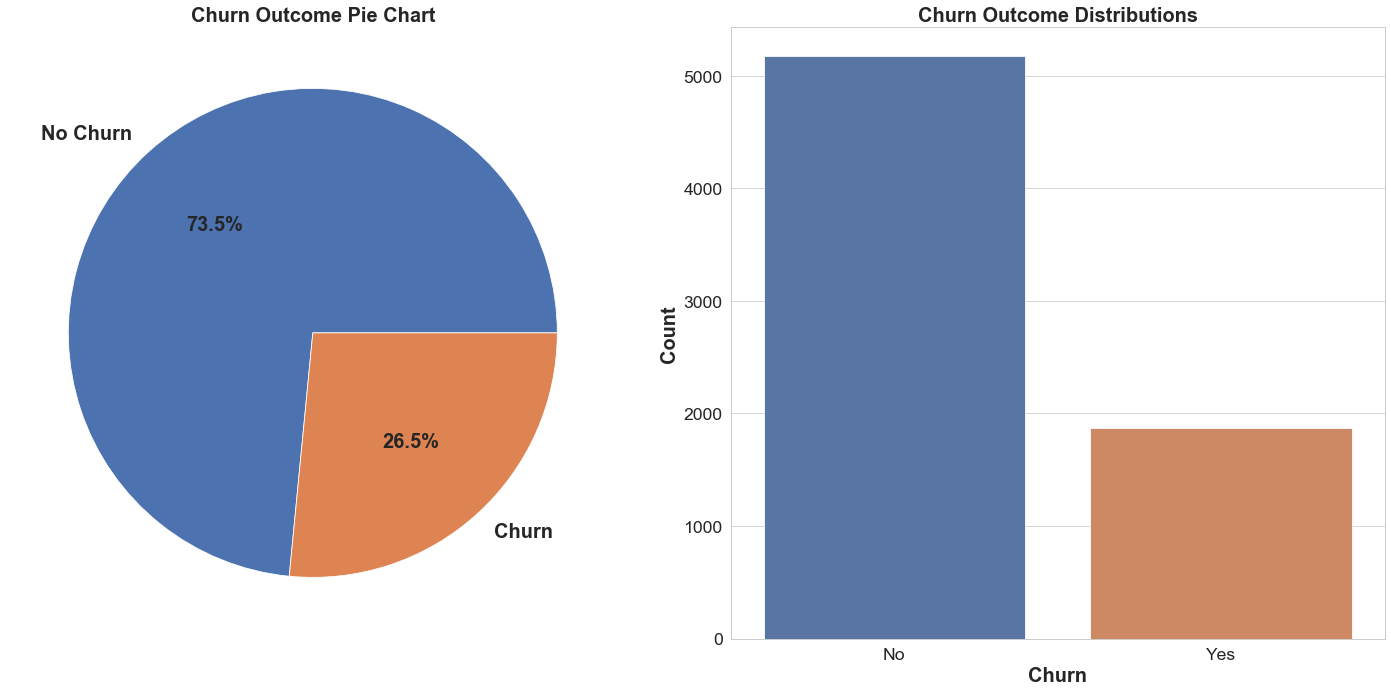

In [45]:
plot_target_dist(df)

# 2. Numerical Feature EDA

## 2.1 Kernel Density Estimations - Tenure, Monthly Charges, Total Charges

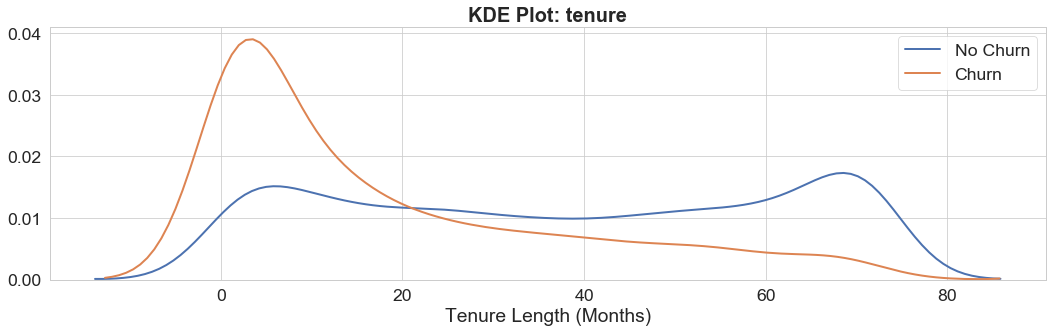

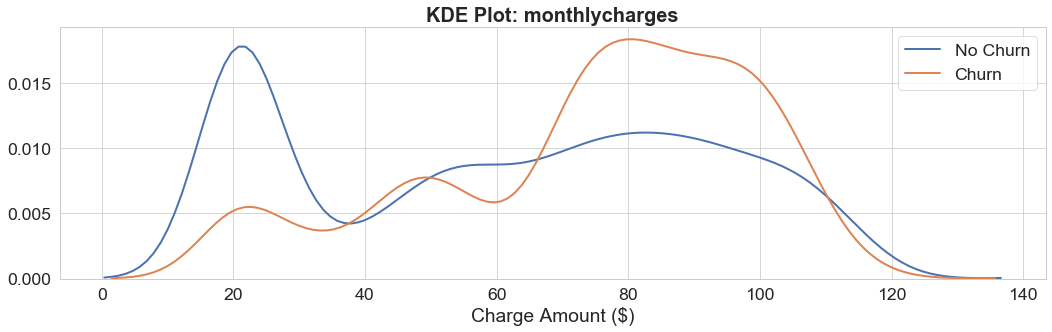

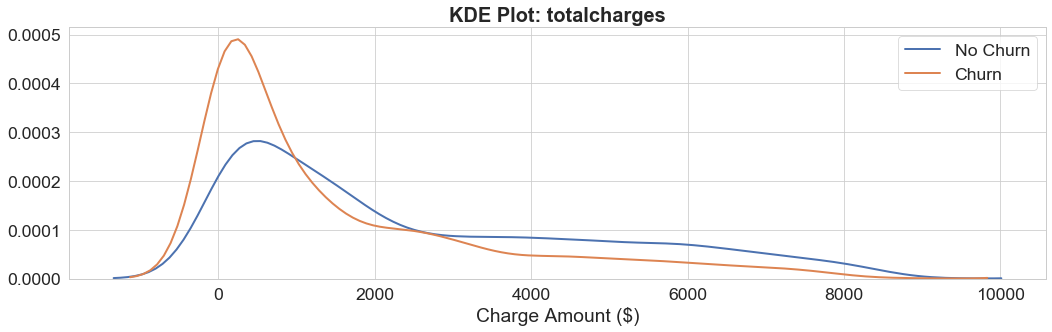

In [47]:
plot_kde(df, 'tenure')
plot_kde(df, 'monthlycharges')
plot_kde(df, 'totalcharges')

## 2.3 Grouping Tenure

In [48]:
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)

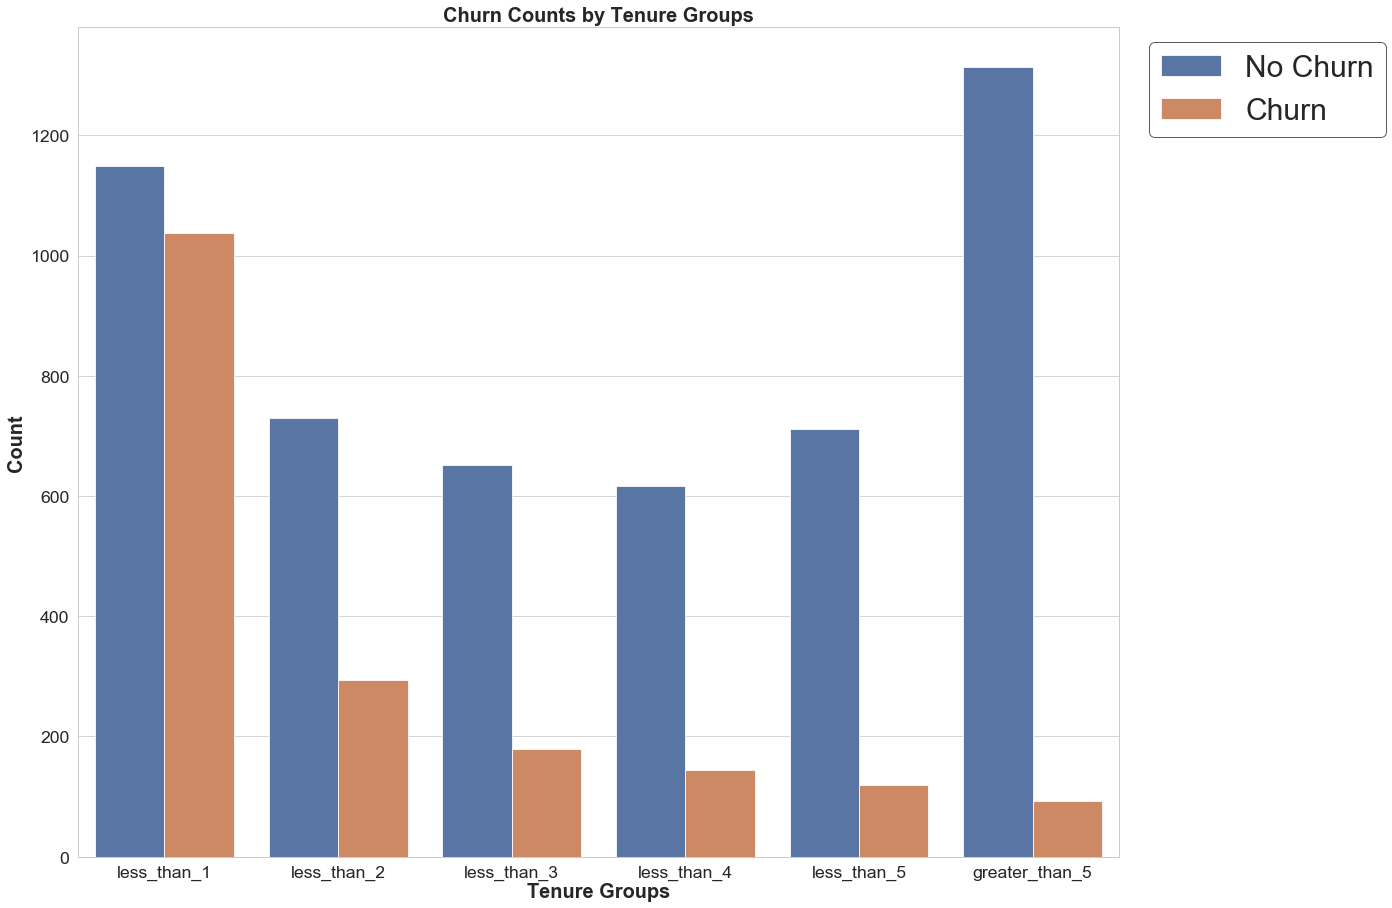

In [49]:
tenure_group_counts(df)

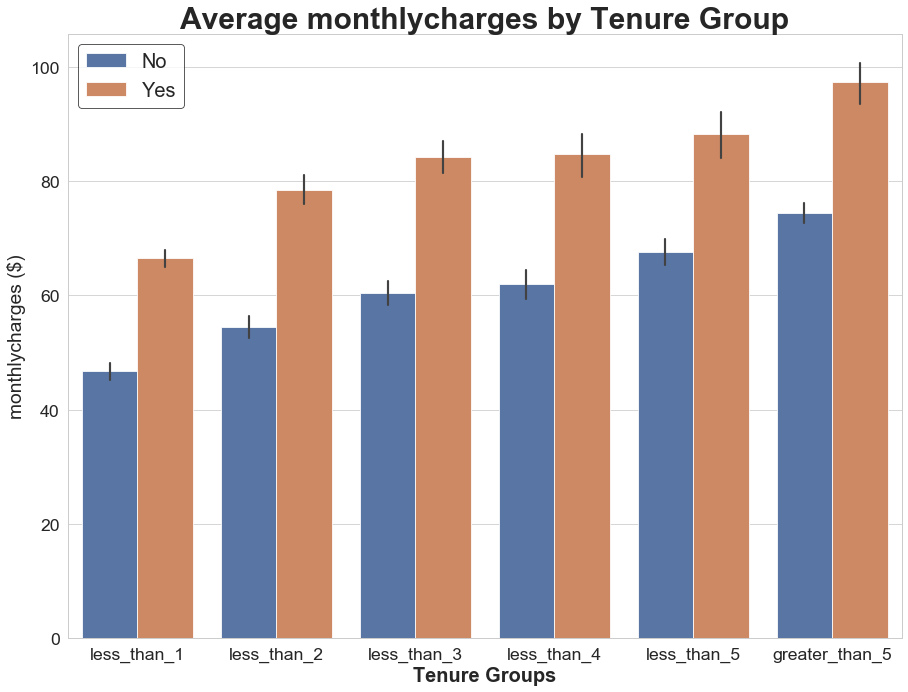

In [50]:
plot_numerical_averages(df, 'monthlycharges')

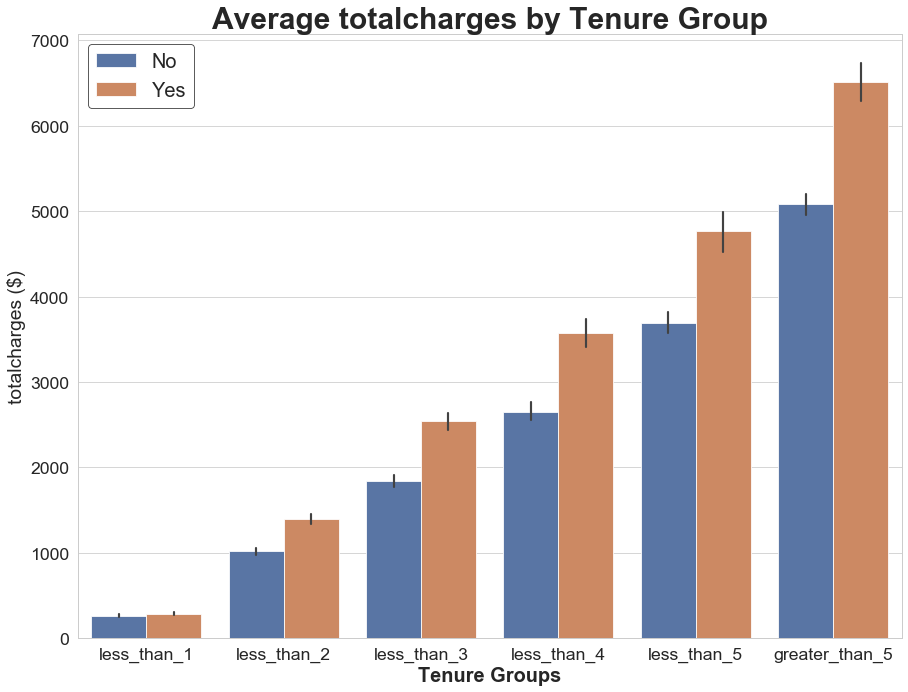

In [51]:
plot_numerical_averages(df, 'totalcharges')

**Numeric Variable Conclusions:**
- Tenure: Customers with lower service tenures (newer clients) have a higher probability of churning than those with long tenures.
- Monthly Charges: Generally speaking, Likelihood of a customer churning increases as charges increase, and customers have the highest probability of churning when their monthly charges exceed 60 dollars. Customers who do not churn are most likely to have bills around 20 dollars, followed by just over 80 dollars. 
- Total Charges: Distributions mostly too general for impact of feature (Monthly is most likely more important)

# 3. Categorical Features

## 3.1 Gender

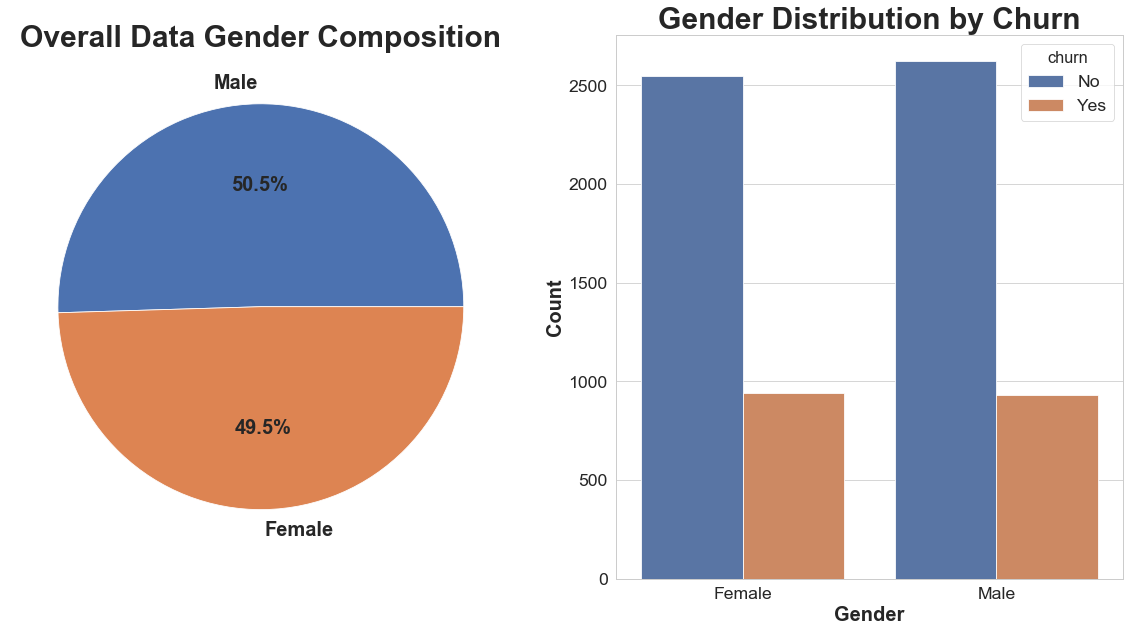

In [52]:
plot_gender_dist(df)

**Gender Conclusion:** Gender is equivalent in representation in our dataset and does not appear to be an indicator of Churn

## 3.2 Age

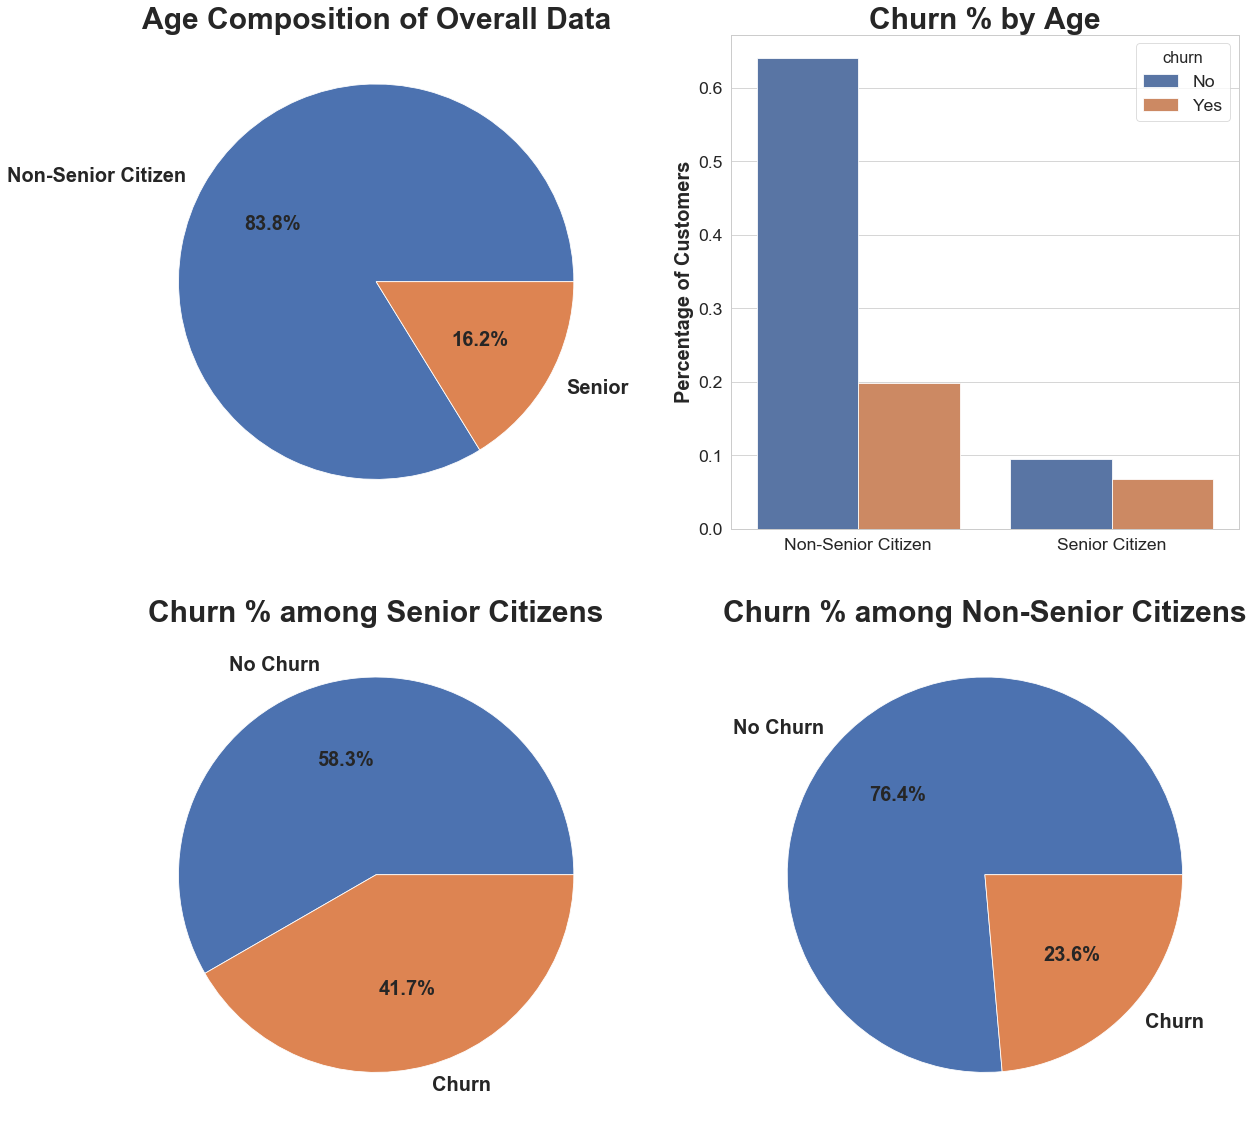

In [53]:
plot_age_dist(df)

**Age Conclusion:**
- Our dataset has significantly less senior citizens than non-seniors (only 16% are senior)
- *Overall*, more non-senior citizens churn than senior citizens
- A higher *proportion* of senior citizens churn than non-senior citizens

## 3.3 Partner & Dependents

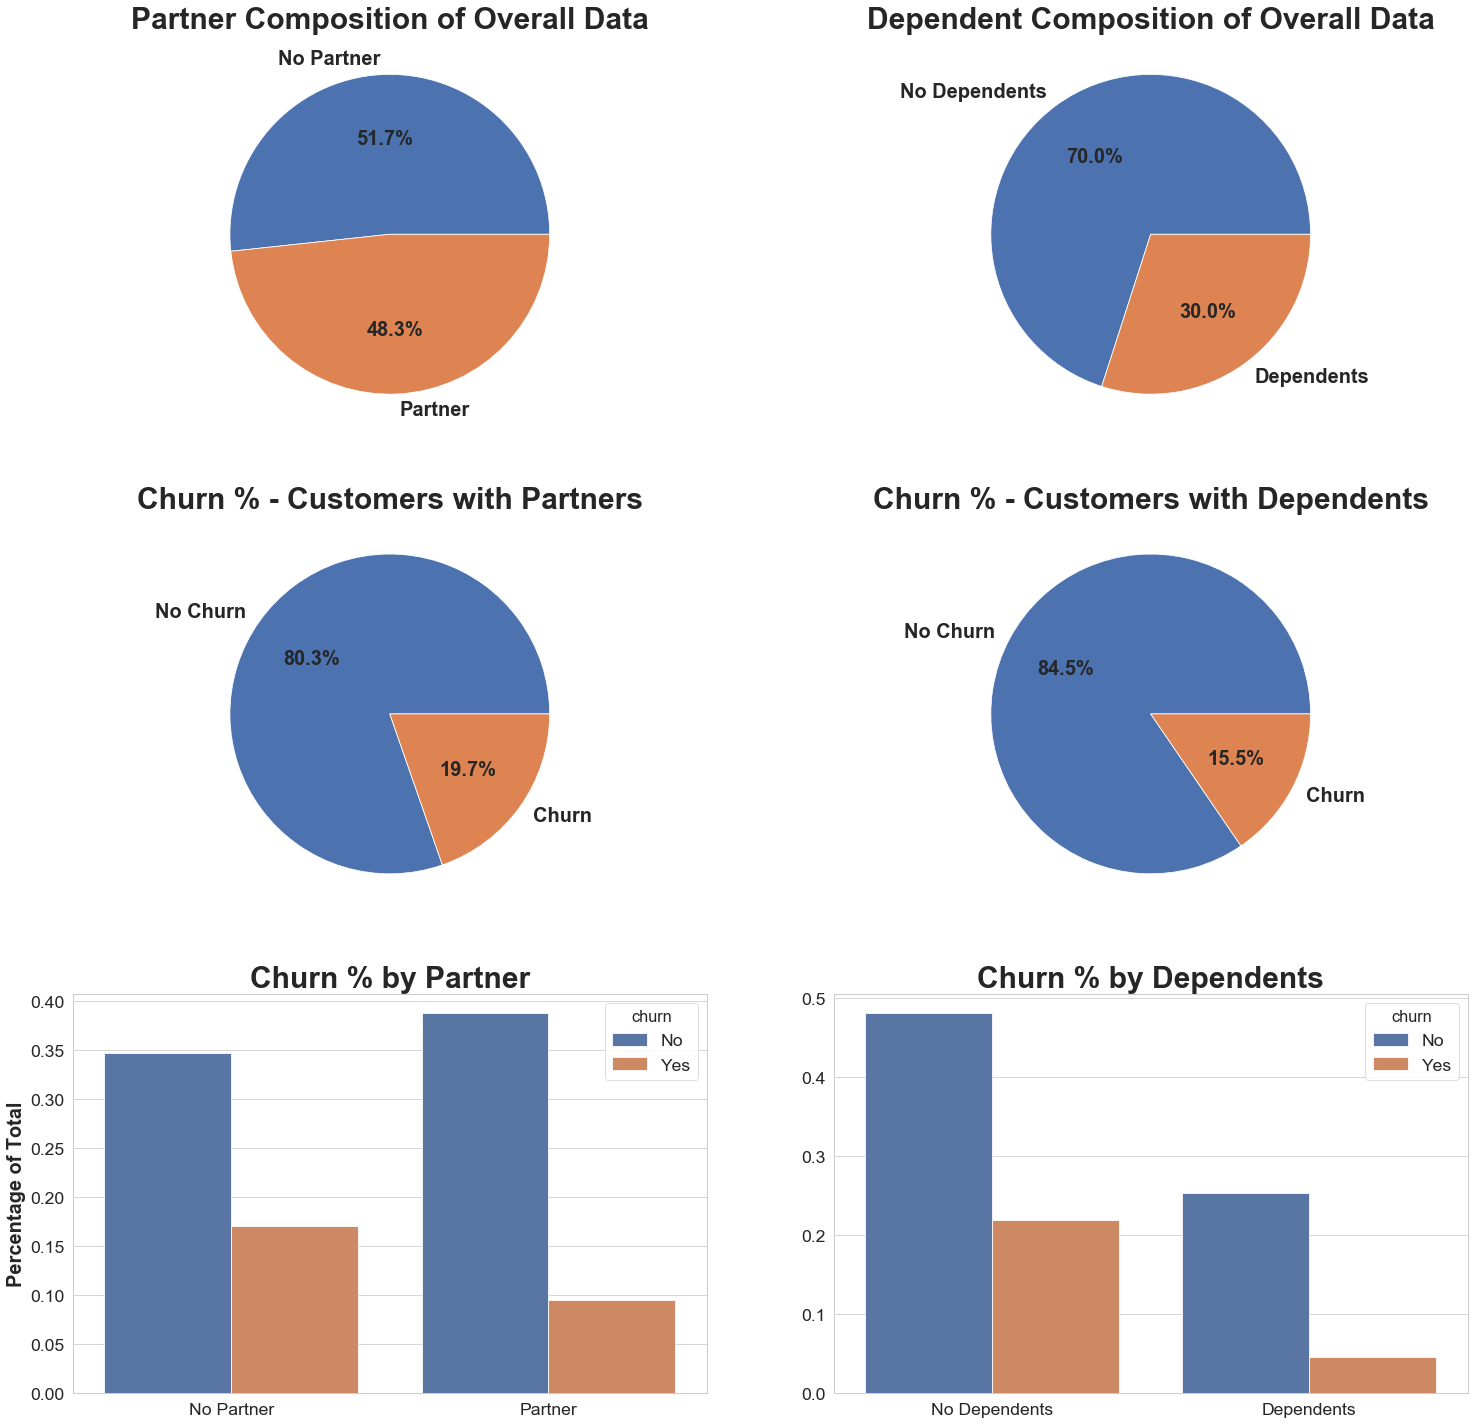

In [122]:
plot_partner_dependents(df)

**Partner/Dependent Conclusions:**
- Overall, those without partners are more likely to churn than those with partners
- Customers without dependents are more likely to churn than those with dependents

In [128]:
df.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,grouped_tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No,less_than_1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.500000,No,less_than_3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes,less_than_1
